In [283]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [284]:
pd.set_option('display.max_columns', 25)

In [285]:
# ------ Define functions ------
def run_kmeans(n_clusters_f, init_f, df_f):
    ##### Complete this function
    # This function should at least take a dataframe as an argument. I have suggested additional arguments you may
    # want to provide, but these can be changed as you need to fit your solution.
    # The output of this function should be the input data frame will the model object KMeans and a data summary. The
    # function will need to add an additional column to the input dataframe called 'predict_cluster_kmeans'
    # that contains the cluster labels assigned by the algorithm.
    k_means_model_f = KMeans(n_clusters = n_clusters_f,init = init_f) #####
    k_means_model_f.fit(df_f)
    df_f['predict_cluster_kmeans'] = k_means_model_f.labels_
    
    # summarize cluster attributes
    #k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(attribute_summary_method_dict)
    k_means_model_f_summary = df_f.groupby('predict_cluster_kmeans').agg(np.mean)
    return k_means_model_f, k_means_model_f_summary


In [286]:
df_subscribers = pd.read_csv('subscribers_final.csv')
df_subscribers.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,...,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,...,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,...,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,...,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,...,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,...,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [288]:
df_subscribers.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [293]:
df_sub = df_subscribers.drop(columns=['Unnamed: 0', 'subid','num_ideal_streaming_services', 'country','attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price','initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF','discount_price','account_creation_date', 'trial_end_date', 'last_payment', 'next_payment', 'cancel_date','num_weekly_services_utilized','trial_completed','payment_period'])

In [294]:
df_sub = pd.get_dummies(df_sub)
df_sub.columns

Index(['weekly_consumption_hour', 'age', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_False', 'male_TF_True'],
      dtype='object')

In [295]:
df_sub = df_sub.drop(columns=['male_TF_False'])
df_sub.loc[(df_sub.age>100)].index
df_sub=df_sub.drop(index=df_sub.loc[(df_sub.age>100)].index)
df_sub = df_sub.dropna(subset=['weekly_consumption_hour','age'])

df_sub.loc[(df_sub.age>100)].index

df_sub=df_sub.drop(index=df_sub.loc[(df_sub.age>100)].index)

df_sub['decade']=0

for d in range(0,10):
    df_sub.loc[df_sub.age>10*d & df_sub.age<(d+1)*10, 'decade']=d
    #怎么把转换好的age填到dataset里？

In [296]:
df_sub.head()

,weekly_consumption_hour,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_access to exclusive content,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True
1,22.951579,70.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,36.001186,25.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
3,20.051667,30.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,22.951579,28.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,20.051667,70.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [297]:
df_sub.columns

Index(['weekly_consumption_hour', 'age', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_True'],
      dtype='object')

In [298]:
df_sub.isnull().sum()

weekly_consumption_hour                     0
age                                         0
package_type_base                           0
package_type_economy                        0
package_type_enhanced                       0
preferred_genre_comedy                      0
preferred_genre_drama                       0
preferred_genre_international               0
preferred_genre_other                       0
preferred_genre_regional                    0
intended_use_access to exclusive content    0
intended_use_education                      0
intended_use_expand international access    0
intended_use_expand regional access         0
intended_use_other                          0
intended_use_replace OTT                    0
intended_use_supplement OTT                 0
male_TF_True                                0
dtype: int64

In [299]:
df_sub.columns

Index(['weekly_consumption_hour', 'age', 'package_type_base',
       'package_type_economy', 'package_type_enhanced',
       'preferred_genre_comedy', 'preferred_genre_drama',
       'preferred_genre_international', 'preferred_genre_other',
       'preferred_genre_regional', 'intended_use_access to exclusive content',
       'intended_use_education', 'intended_use_expand international access',
       'intended_use_expand regional access', 'intended_use_other',
       'intended_use_replace OTT', 'intended_use_supplement OTT',
       'male_TF_True'],
      dtype='object')

In [301]:
# ------ RUN CLUSTERING -----
# --- set parameters
n_clusters = 3
init_point_selection_method = 'k-means++'

# --- select data
cols_for_clustering = df_sub.columns ##### specify list of attributes on which to base clusters
df_cluster = df_sub.loc[:, cols_for_clustering]

# --- split to test and train
df_cluster_train, df_cluster_test, _, _, = train_test_split(df_cluster, [1]*df_cluster.shape[0], test_size=0.5)   # ignoring y values for unsupervised

# --- fit model
#attribute_summary_method_dict = {'package_type': sum, 'preferred_genre': sum, 'weekly_consumption_hour': np.mean, 'weekly_consumption_hour':sum,'age': np.mean,'age':sum, 'male_TF_True': sum, 'payment_period': sum}
#col_output_order = ['package_type', 'preferred_genre','weekly_consumption_hour','age', 'male_TF','payment_period'] ##### specify order of output columns for easy of readability

# training data
train_model, train_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_train.reindex())
# testing data
test_model, test_model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster_test.reindex())
# all data
model, model_summary = run_kmeans(n_clusters, init_point_selection_method, df_cluster)

In [302]:
# add the code to run the clustering algorithm for various numbers of clusters
ks = range(1,12)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(df_cluster)
    inertias.append(model.inertia_)

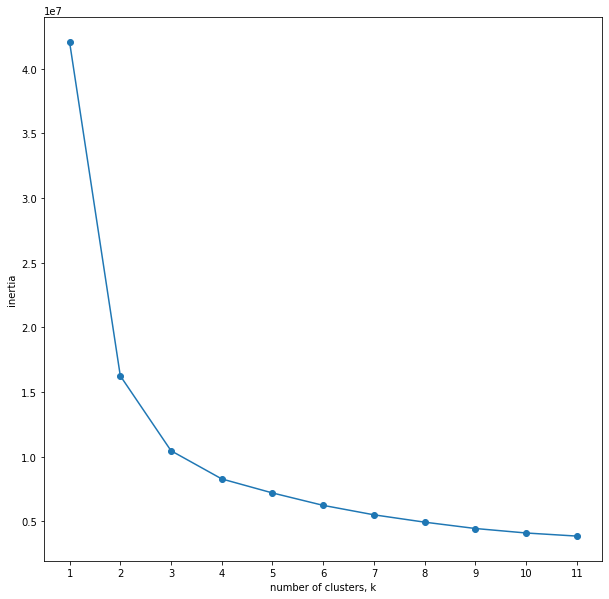

In [303]:
# create an elbow plot for your numbers of clusters in previous step
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [304]:
df_cluster.to_csv('clustering_output_final.csv')